In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df2018 = pd.read_csv('../data/Fantasy_half_ppr_pts2018.csv')
df2019 = pd.read_csv('../data/Fantasy_half_ppr_pts2019.csv')
df2020 = pd.read_csv('../data/Fantasy_half_ppr_pts2020.csv')
df2021 = pd.read_csv('../data/Fantasy_half_ppr_pts2021.csv')
df2022 = pd.read_csv('../data/Fantasy_half_ppr_pts2022.csv')
draftrank = pd.read_csv('../data/FantasyPros_2023_Draft_ALL_Rankings.csv')

In [25]:
df2018 = df2018.assign(Season_Yr=2018)
df2019 = df2019.assign(Season_Yr=2019)
df2020 = df2020.assign(Season_Yr=2020)
df2021 = df2021.assign(Season_Yr=2021)
df2022 = df2022.assign(Season_Yr=2022)

In [26]:
combined_df = pd.concat([df2018, df2019, df2020, df2021, df2022])

In [27]:
draftrank.columns
# Define the new column names
new_column_names = {'RK': 'Rank', 'TIERS': 'Tiers', 'PLAYER NAME': 'Player Name', 'TEAM': 'Team',
                    'POS': 'Fantasy Position', 'BYE WEEK': 'Bye Week', 'SOS SEASON': 'Strength of Schedule',
                    'ECR VS. ADP': 'ECR vs. ADP'}

# Rename the columns in the combined_df DataFrame
draftrank = draftrank.rename(columns=new_column_names)

# Print the updated DataFrame with the renamed columns
print(draftrank)



     Rank  Tiers               Player Name Team Fantasy Position Bye Week  \
0       1      1       Christian McCaffrey   SF              RB1        9   
1       2      1          Justin Jefferson  MIN              WR1       13   
2       3      1             Austin Ekeler  LAC              RB2        5   
3       4      1             Ja'Marr Chase  CIN              WR2        7   
4       5      2              Travis Kelce   KC              TE1       10   
5       6      2               Cooper Kupp  LAR              WR3       10   
6       7      2            Saquon Barkley  NYG              RB3       13   
7       8      2           Jonathan Taylor  IND              RB4       11   
8       9      2               Tyreek Hill  MIA              WR4       10   
9      10      3            Bijan Robinson  ATL              RB5       11   
10     11      3              Stefon Diggs  BUF              WR5       13   
11     12      3             Derrick Henry  TEN              RB6        7   

In [28]:
combined_df
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Rename columns '1' to '17' to 'wk1' to 'wk17'
new_columns = {str(i): f'wk{i}' for i in range(1, 19)}
combined_df = combined_df.rename(columns=new_columns)
print(combined_df)


         #                    Player  Pos Team   wk1   wk2   wk3   wk4   wk5  \
0      1.0        Patrick Mahomes II   QB   KC  28.3  38.8  25.3  22.9  15.8   
1      2.0                 Matt Ryan   QB   FA   8.8  30.7  40.2  29.3  14.4   
2      3.0            Todd Gurley II   RB   FA  22.2  30.8  22.1  23.6  31.3   
3      4.0        Ben Roethlisberger   QB   FA     9    39    24  14.9  21.6   
4      5.0            Saquon Barkley   RB  NYG  19.8  17.8  20.2    19  26.9   
5      6.0       Christian McCaffrey   RB   SF  10.5  20.9  20.4     -  17.8   
6      7.0            Deshaun Watson   QB  CLE    11  22.8    25  31.1    21   
7      8.0              Alvin Kamara   RB   NO  38.6  14.9  26.5  38.6   5.4   
8      9.0             Aaron Rodgers   QB  NYJ  24.9    16  19.9    15  28.7   
9     10.0                Jared Goff   QB  DET  17.2  18.4  25.6  39.3  14.3   
10    11.0                Drew Brees   QB   FA  31.6  17.6  40.5   8.6  27.2   
11    12.0            Russell Wilson   Q

What Positions seem to score the most points?

In [29]:
# Create a copy of the DataFrame to preserve the original data
combined_df = combined_df.copy()

# Get the list of years to remove "wk18" from
years_to_remove_wk18 = combined_df['Season_Yr'].unique()
years_to_remove_wk18 = list(filter(lambda year: year not in [2021, 2022], years_to_remove_wk18))

# Remove the "wk18" column from the specified years
combined_df.loc[combined_df['Season_Yr'].isin(years_to_remove_wk18), 'wk18'] = np.nan

# Define the desired column order
new_columns = ['#', 'Player', 'Pos', 'Team', 'Season_Yr', 'wk1', 'wk2', 'wk3', 'wk4', 'wk5', 'wk6',
                   'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12', 'wk13', 'wk14', 'wk15', 'wk16', 'wk17',
                   'wk18', 'AVG', 'TTL']

# Reindex the DataFrame with the desired column order
combined_df = combined_df.reindex(columns=new_columns)

# Print the updated DataFrame with the columns in the desired order
print(combined_df)

         #                    Player  Pos Team  Season_Yr   wk1   wk2   wk3  \
0      1.0        Patrick Mahomes II   QB   KC       2018  28.3  38.8  25.3   
1      2.0                 Matt Ryan   QB   FA       2018   8.8  30.7  40.2   
2      3.0            Todd Gurley II   RB   FA       2018  22.2  30.8  22.1   
3      4.0        Ben Roethlisberger   QB   FA       2018     9    39    24   
4      5.0            Saquon Barkley   RB  NYG       2018  19.8  17.8  20.2   
5      6.0       Christian McCaffrey   RB   SF       2018  10.5  20.9  20.4   
6      7.0            Deshaun Watson   QB  CLE       2018    11  22.8    25   
7      8.0              Alvin Kamara   RB   NO       2018  38.6  14.9  26.5   
8      9.0             Aaron Rodgers   QB  NYJ       2018  24.9    16  19.9   
9     10.0                Jared Goff   QB  DET       2018  17.2  18.4  25.6   
10    11.0                Drew Brees   QB   FA       2018  31.6  17.6  40.5   
11    12.0            Russell Wilson   QB  DEN      

What position tends to be the preferred choice for a person's picks in the first five rounds?

In [30]:
# Sort the DataFrame by 'Rank' column in ascending order
draftrank_sorted = draftrank.sort_values('Rank')

# Get the positions and corresponding player names of the first 5 picks
first_5_picks = draftrank_sorted.head(5)[['Fantasy Position']]

# Print the positions and corresponding player names of the first 5 picks
print(first_5_picks)

  Fantasy Position
0              RB1
1              WR1
2              RB2
3              WR2
4              TE1


Year over Year, what position scores the most points?

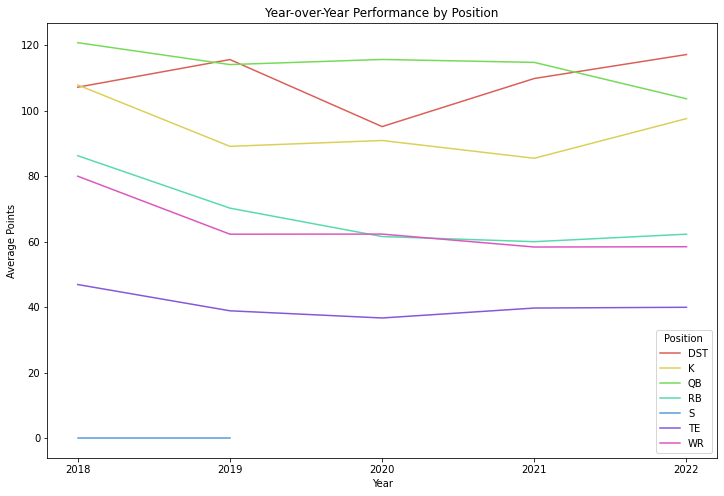

In [31]:
# Group the data in combined_df by 'Season_Yr' and 'Pos' and calculate the average points for each position in each year
position_points = combined_df.groupby(['Season_Yr', 'Pos'])['TTL'].mean().reset_index()

# Set a vibrant color palette
colors = sns.color_palette('hls', len(position_points['Pos'].unique()))

# Plot the average points scored by each position over the years
plt.figure(figsize=(12, 8))
sns.lineplot(x='Season_Yr', y='TTL', hue='Pos', data=position_points, palette=colors)
plt.title('Year-over-Year Performance by Position')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.legend(title='Position')

# Set the x-axis ticks as whole numbers
plt.xticks(position_points['Season_Yr'].unique(), map(int, position_points['Season_Yr'].unique()))

plt.show()

What player has scored the most points in 2018, 2019, 2020, 2021 and 2022

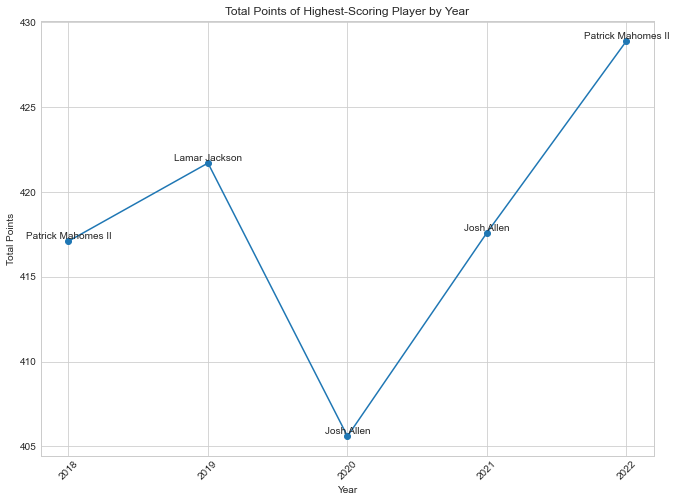

In [74]:
# Filter the data by each year and find the player with the highest total points
years = [2018, 2019, 2020, 2021, 2022]
highest_scoring_players = []
total_points = []

for year in years:
    df_year = combined_df[combined_df['Season_Yr'] == year]
    highest_scoring_player = df_year.loc[df_year['TTL'].idxmax(), 'Player']
    highest_scoring_players.append(highest_scoring_player)
    total_score = df_year.loc[df_year['TTL'].idxmax(), 'TTL']
    total_points.append(total_score)
plt.figure(figsize=(11,8))    

# plotting
plt.plot(years, total_points, marker='o')
plt.xlabel('Year')
plt.xticks(years)
plt.ylabel('Total Points')
plt.title('Total Points of Highest Scoring Player by Year')

# Add labels for the highest-scoring players
for i, player in enumerate(highest_scoring_players):
    plt.text(years[i], total_points[i], player, ha='center', va='bottom')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

Which Position catergory seems to be the most used?

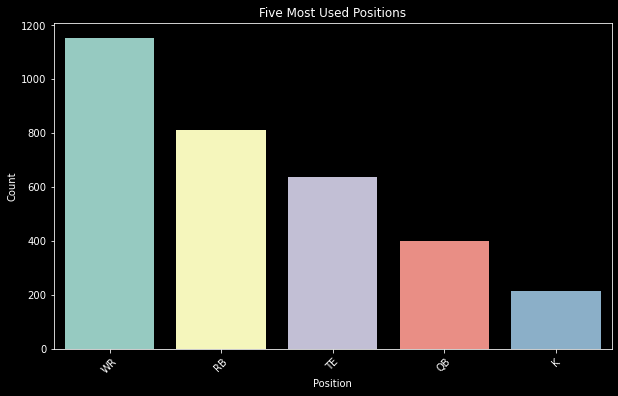

In [ ]:
# Count the occurrences of each position
position_counts = combined_df['Pos'].value_counts()

# Find the five positions with the highest counts
most_used_positions = position_counts.head(5)

# Plot the five most used positions
plt.figure(figsize=(10, 6))
sns.barplot(x=most_used_positions.index, y=most_used_positions.values)
plt.title('Five Most Used Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

What Position catergory seems to be the least used?

In [ ]:
# Count the occurrences of each position
position_counts = combined_df['Pos'].value_counts()

# Find the position with the lowest count
least_used_position = position_counts.idxmin()

# least used position
print("The least used position category is:", least_used_position)

The least used position category is: S


Which player tends to be the first pick consistently over the years?

In [ ]:
# Group the data in combined_df by 'Season_Yr' and find the player with the highest average ranking in each year
first_pick_players = combined_df.groupby('Season_Yr')['Player'].first()

# Count the occurrences of each player in the 'Player Name' column of draftrank DataFrame
player_counts = draftrank['Player Name'].value_counts()

# player with the highest count
most_picked_player = player_counts.idxmax()

# player who tends to be the first pick consistently over the years
print("Player who tends to be the first pick consistently over the years:", most_picked_player)

Player who tends to be the first pick consistently over the years: Christian McCaffrey


What is the distribution of average performance ('AVG') across different positions ('Pos')?

      count       mean       std  min  25%   50%     75%   max
Pos                                                           
DST   160.0   6.646250  1.956794  2.2  5.6   6.5   7.825  14.5
K     216.0   7.116204  2.523778 -0.2  6.2   7.6   8.600  13.0
QB    400.0  10.074250  7.741682 -1.1  2.3  11.2  16.300  28.1
RB    810.0   5.299383  5.237380 -1.0  0.9   3.7   8.400  27.3
S       2.0   0.000000  0.000000  0.0  0.0   0.0   0.000   0.0
TE    638.0   3.141850  3.205787  0.0  0.6   2.1   4.600  17.4
WR   1151.0   4.862467  4.554871 -1.0  0.9   3.6   7.800  21.6


c:\Users\redst\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\redst\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\redst\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\redst\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\redst\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.1% of the points 

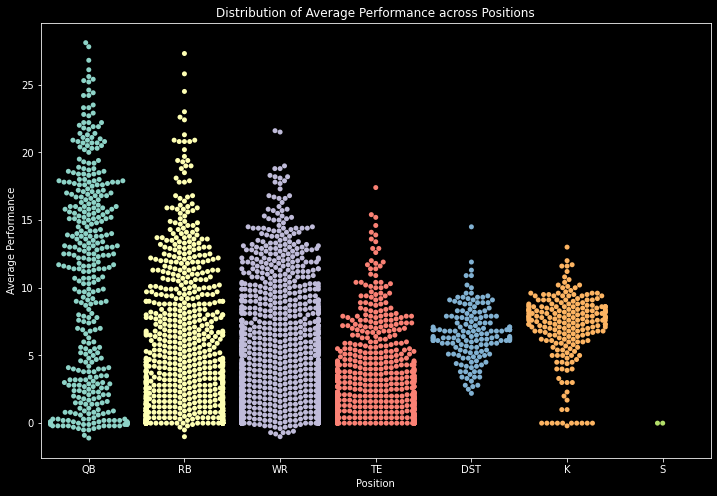

In [ ]:
# Filter the DataFrame to include 'AVG' and 'Pos' columns
performance_by_position = combined_df[['AVG', 'Pos']]

# Group the DataFrame by 'Pos' and calculate descriptive statistics of 'AVG'
performance_stats = performance_by_position.groupby('Pos')['AVG'].describe()

# Print the descriptive statistics
print(performance_stats)
# Distribution of average perfromance
plt.figure(figsize=(12, 8))
sns.swarmplot(data=performance_by_position, x='Pos', y='AVG')
plt.xlabel('Position')
plt.ylabel('Average Performance')
plt.title('Distribution of Average Performance across Positions')
plt.show()

In [ ]:

# Sort the dataframe by 'Tiers' and 'Rank' columns in descending order
sorted_df = draftrank.sort_values(by=['Tiers', 'Rank'], ascending=False)

# Get the unique top two positions
top_positions = sorted_df['Fantasy Position'].unique()[:2].tolist()

# Print the top two positions
print("Top Two positions based on Tier and ratings:", top_positions)

Top two unique positions based on ratings and tiers: ['QB37', 'QB36']


In [55]:
draftrank.columns

Index(['Rank', 'Tiers', 'Player Name', 'Team', 'Fantasy Position', 'Bye Week',
       'Strength of Schedule', 'ECR vs. ADP'],
      dtype='object')